In [1]:
import json
import pandas as pd
import plotly.offline as po
po.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE

In [2]:
import codecs
data = []
classes=[]
with codecs.open('data.json') as f:
    big_json = json.load(f)
    for hyp in big_json:
        ents = hyp["entities"]
        text = hyp["text"]
        for ent in ents:
            text = text.replace(ent["value"], ent["type"])
        data.append(text)
        classes.append(hyp["intent"])

In [3]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec(glove_input_file="glove.6B.100d.txt", word2vec_output_file="gensim_glove_vectors.txt")

(400000, 100)

In [4]:
from gensim.models.keyedvectors import KeyedVectors
glove_model = KeyedVectors.load_word2vec_format("gensim_glove_vectors.txt", binary=False)

In [5]:
def compute_vec(word):
    if "_" in word:
        return word.split("_")[0]
    else:
        return "unk"

In [7]:
dataX = [ [(glove_model[word] if word in glove_model else glove_model[compute_vec(word)]) for word in sentence.split()] for sentence in data]

In [9]:
import numpy as np
X=[]
for xx in dataX:
    y = np.mean(xx, axis=0)
    X.append(y)

In [64]:
tsne_model = TSNE(perplexity=40, n_components=3, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(X)

In [14]:
    x = []
    y = []
    z = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        z.append(value[2])

In [13]:
xxx = set(classes)
l = {}
for i, xx in enumerate(xxx):
    #l[xx] = list(map(int,list(np.binary_repr(i, width=6))))
    l[xx] = i

Classes = [l[ii] for ii in classes]

In [15]:
trace0 = go.Scatter3d(
    x = x,
    y = y,
    z=z,
  # name = Classes,
  #  hoveron = Classes,
    mode = 'markers',
#     text = Target.unique(),
    showlegend = False,
    hoverinfo = "text",
    marker = dict(
        size = 8,
        color = Classes,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
points = [trace0]

layout = dict(title = 't-SNE',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= True
             )

fig = dict(data=points, layout=layout)
po.iplot(fig, filename='styled-scatter')

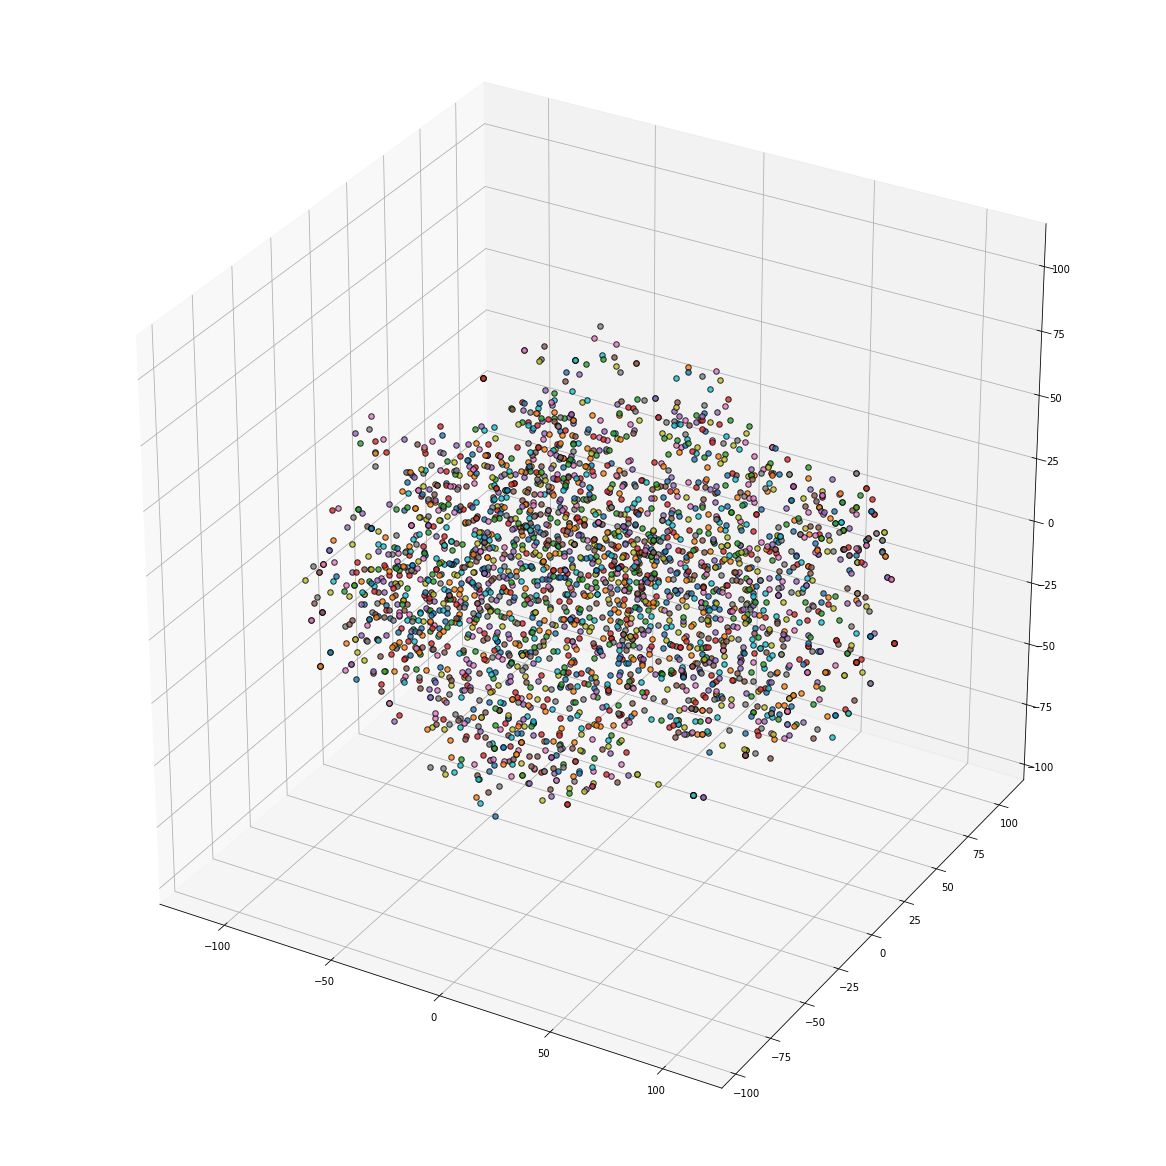

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,16))
ax = Axes3D(fig)

for data, color, group in zip(new_values, classes, classes):
    a1, b1, c1 = data
    ax.scatter(a1, b1, c1, alpha=0.8, edgecolors='none', s=30, label=group)

#ax.scatter(x, y, z, c= Classes, label = classes)
plt.show()

In [22]:
class_list = set(classes)
class_list

{'calls.dial',
 'messages.inquire',
 'messages.reply',
 'messages.write',
 'misc.car_light',
 'misc.ceil_light',
 'misc.convert_roof',
 'misc.current_location',
 'misc.fly',
 'misc.greeting',
 'misc.help',
 'misc.jump',
 'misc.party',
 'misc.phone_book',
 'misc.profanity',
 'misc.seat',
 'misc.seat_temp',
 'misc.switch_off',
 'misc.time',
 'misc.unsupported',
 'misc.ventialtion',
 'misc.ventilation',
 'misc.weather',
 'misc.window',
 'misc.wiper',
 'music.pause',
 'music.play',
 'music.random',
 'navigation.inquire',
 'navigation.start',
 'navigation.stop',
 'universals.accept',
 'universals.back',
 'universals.cancel',
 'universals.next',
 'universals.reject',
 'universals.repeat',
 'universals.select',
 'universals.show',
 'universals.stop',
 'universals.volume_down',
 'universals.volume_up'}

In [65]:
class_accums = defaultdict(list)
for class_name in clss_list:
    for i, cls_name in enumerate(classes):
        if (cls_name == class_name):
            class_accums[class_name].append(new_values[i])

In [66]:
class_means = {}
for class_name in clss_list:
    class_means[class_name] = np.mean(class_accums[class_name], axis=0)

In [67]:
class_means["misc.jump"]

array([ 58.319824, -13.896759,  38.523907], dtype=float32)

In [69]:
class_accums["misc.jump"]

[array([ 84.12768 , -10.007252,  43.008965], dtype=float32),
 array([-16.986881, -26.62501 ,  31.096214], dtype=float32),
 array([79.047775, -9.369418, 42.224354], dtype=float32),
 array([72.13509 , -9.512713, 37.096123], dtype=float32),
 array([ 73.27544 , -13.969402,  39.19388 ], dtype=float32)]

In [70]:
centers = []
for class_name in clss_list:
    centers.append(class_means[class_name])

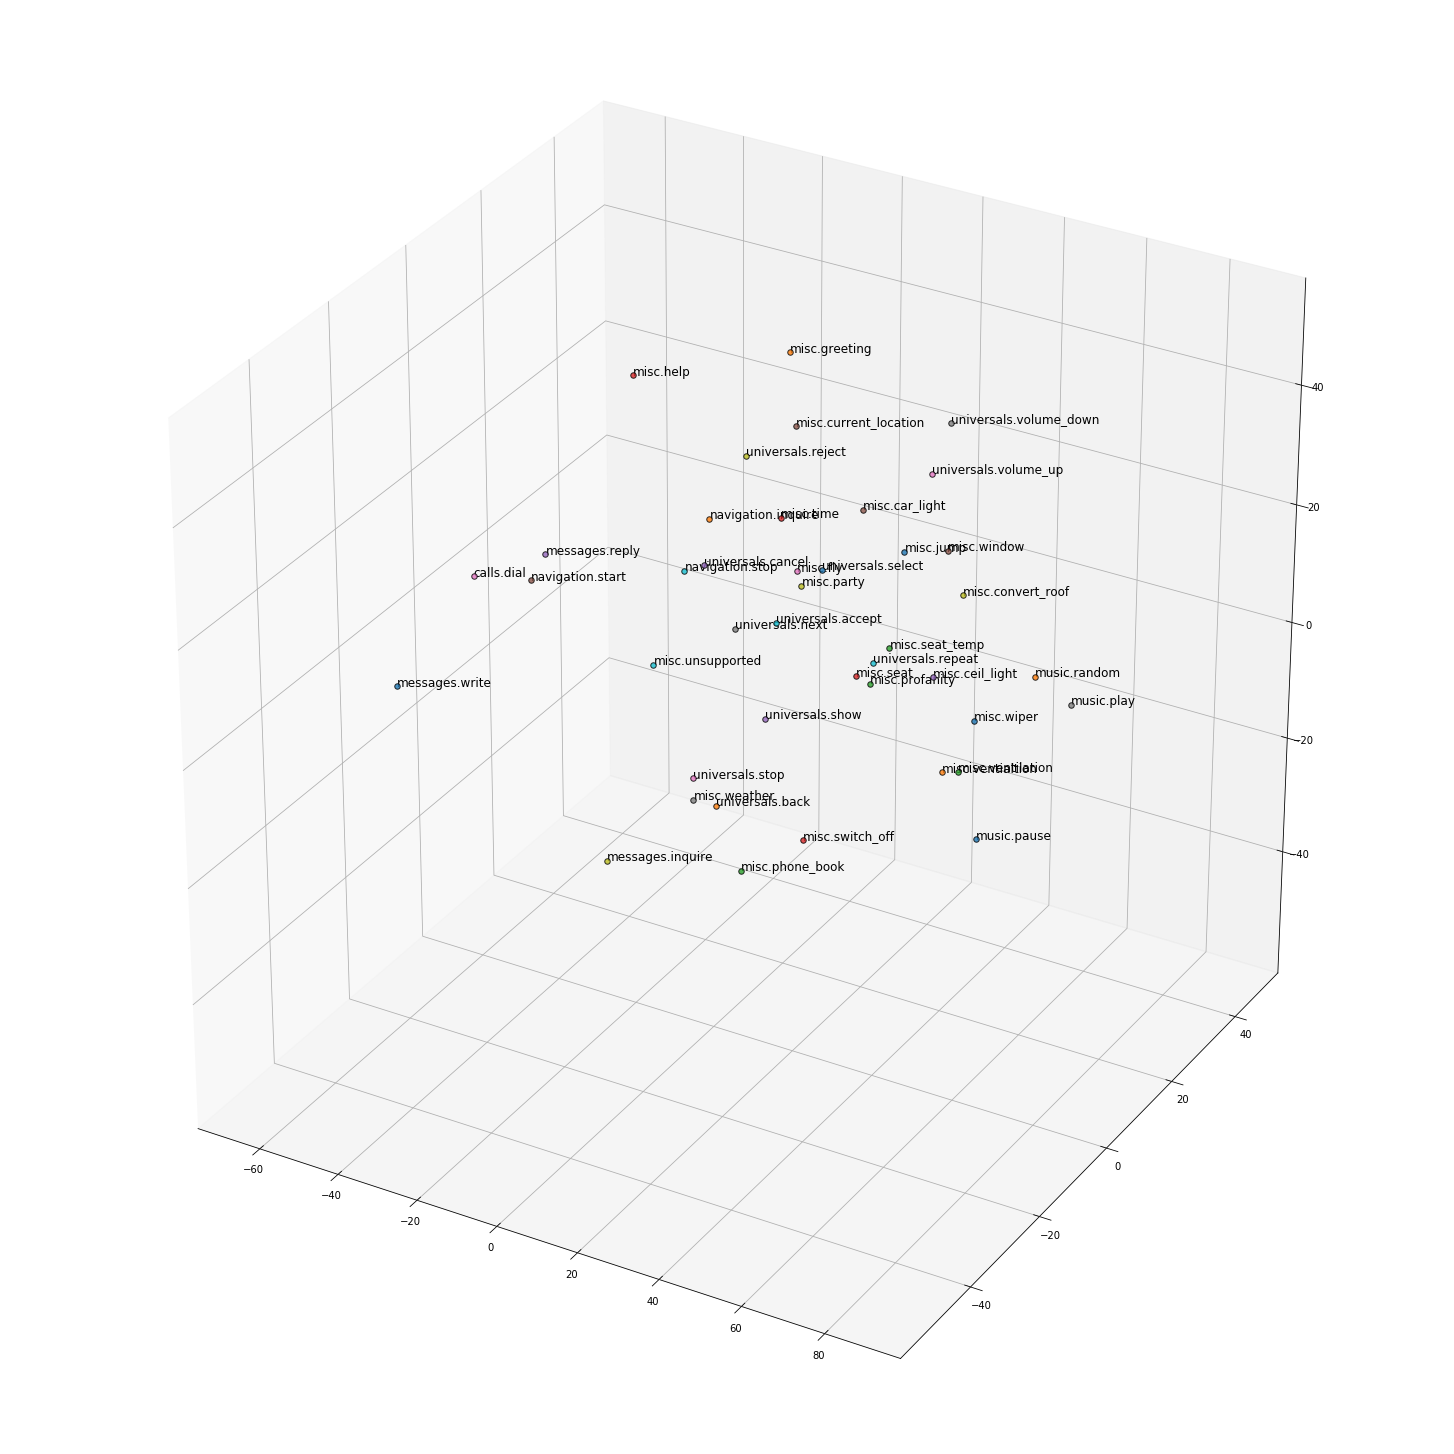

In [73]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,20))
ax = Axes3D(fig)

for data, color, group in zip(centers, clss_list, class_list):
    a1, b1, c1 = data
    ax.scatter(a1, b1, c1, alpha=0.8, edgecolors='none', s=30, label=group)
    ax.text(a1, b1, c1, group, size=12, zorder=1, color="k")

#ax.scatter(x, y, z, c= Classes, label = classes)
plt.show()

In [48]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(X)

In [57]:
class_accums = defaultdict(list)
for class_name in clss_list:
    for i, cls_name in enumerate(classes):
        if (cls_name == class_name):
            class_accums[class_name].append(new_values[i])

In [58]:
class_means = {}
for class_name in clss_list:
    class_means[class_name] = np.mean(class_accums[class_name], axis=0)

In [59]:
centers = []
for class_name in clss_list:
    centers.append(class_means[class_name])

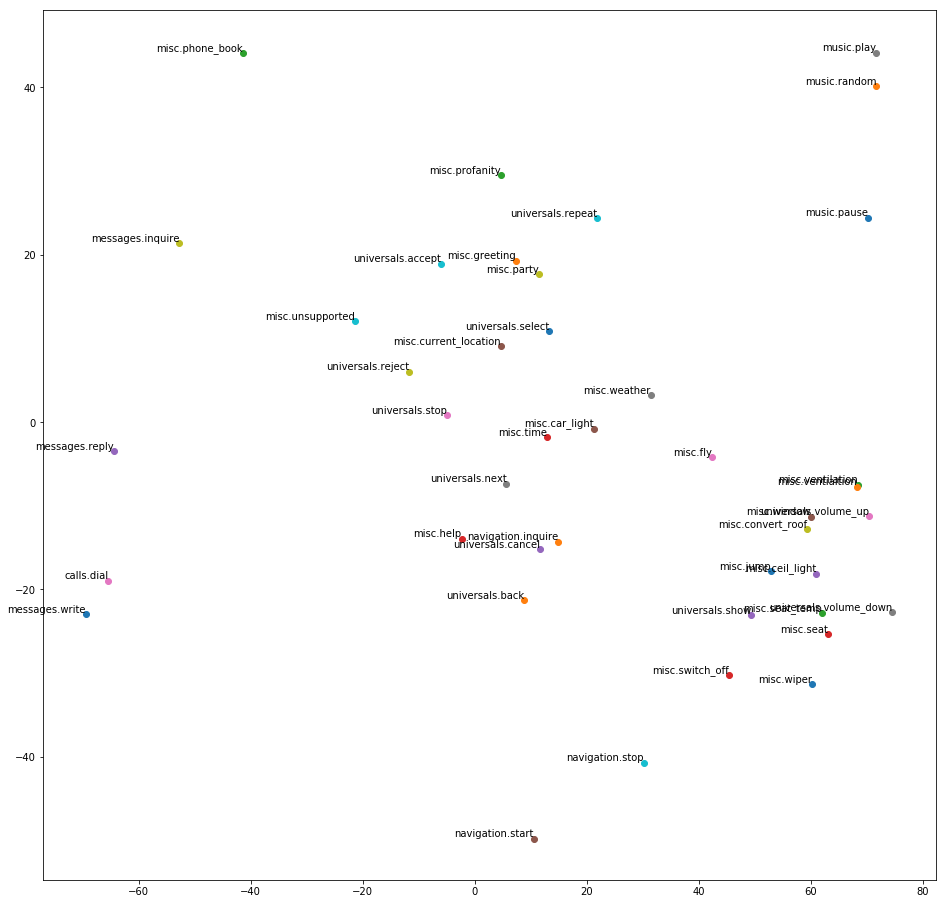

In [63]:
    plt.figure(figsize=(16, 16)) 
    for i in range(len(centers)):
        plt.scatter(centers[i][0],centers[i][1])
        plt.annotate(clss_list[i],
                     xy=(centers[i][0], centers[i][1]),
                     ha='right',
                     va='bottom')
    plt.show()

In [56]:
clss_list = list(class_list)